In [5]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\Admin\resources\GDPList.csv',encoding = 'ISO-8859-1')
data.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [7]:
#Bộ dữ liệu chứa 125 dòng dữ liệu và 3 cột
#Country, Continent: là thuộc tính định tính, có thang đo định danh
#GDP: thuộc tính định lượng, thang đo ratio 

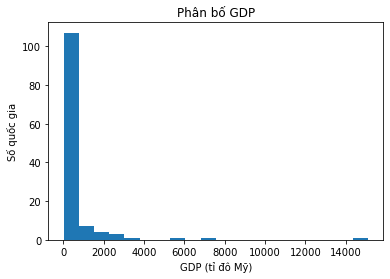

In [25]:
plt.hist(data['GDP (millions of US$)']/1000, bins = 20)
plt.title("Phân bố GDP")
plt.xlabel('GDP (tỉ đô Mỹ)')
plt.ylabel('Số quốc gia')
plt.show()

In [26]:
country = data.Country.unique()
print('Số lượng các quốc gia: ' + str(country.size))

Số lượng các quốc gia: 125


In [27]:
#Hơn 80% các quốc gia có GDP <1000 tỷ đô Mỹ 

In [28]:
#Mỗi châu lục có bao nhiêu quốc gia
data.groupby('Continent')['Country'].count()

Continent
Africa           29
Asia             36
Europe           37
North America    11
Oceania           3
South America     9
Name: Country, dtype: int64

In [29]:
#Tổng GDP các châu lục
data.groupby('Continent')['GDP (millions of US$)'].sum()

Continent
Africa            1820811
Asia             24425891
Europe           19139380
North America    18238447
Oceania           1662727
South America     4141217
Name: GDP (millions of US$), dtype: int64

In [30]:
#Top 10 quốc gia doanh thu lớn nhất
GDP_country = data.groupby(['Country'])['GDP (millions of US$)'].sum().sort_values(ascending= False)
GDP_country.head(10)

Country
 United States     15094025
 China              7298147
 Japan              5869471
 Germany            3577031
 France             2776324
 Brazil             2492908
 United Kingdom     2417570
 Italy              2198730
 Russia             1850401
 Canada             1736869
Name: GDP (millions of US$), dtype: int64